# Calculate global bottom velocity and its std from KDS75

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap, shiftgrid # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


In [2]:
# function to do latitude shifting:
def shifted(input,geolon):
    ny,nx = geolon.shape
    shifted = np.zeros(input.shape)
    for j in range(ny):
        ii = np.max(np.where(geolon[j,:]<-180)) + 1
        shifted[j,(3600-ii):] = input[j,:ii]
        shifted[j,:(3600-ii)] = input[j,ii:]
    return shifted

In [3]:
# Extract the variables
file ='/Users/johnspence/Documents/ccrcproc/BottVel/kds75.ocean_grid.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
lat = nc.variables['yu_ocean'][:]
h = nc.variables['hu'][:]
nc.close() # close the file


In [4]:
file ='/Users/johnspence/Documents/ccrcproc/BottVel/botvel.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
ubot = nc.variables['ubot'][:]
vbot = nc.variables['vbot'][:]
nc.close() # close the file

In [5]:
ubot.shape

(37, 2700, 3600)

In [9]:
vbot.shape

(37, 2700, 3600)

## plot bottom v vel at day 1

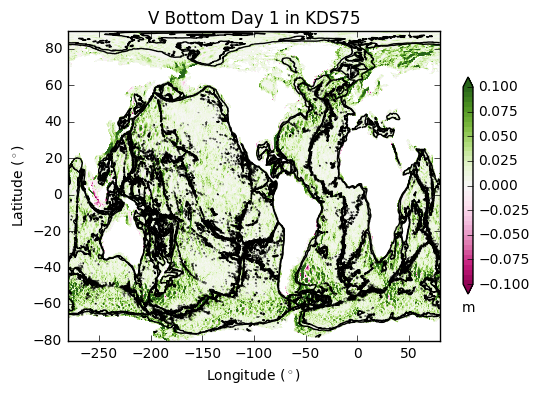

In [8]:
clev = np.arange(-.1,.105,0.005)
klev = np.arange(1000,4000,2000)

plt.contourf(geolon_t,geolat_t,vbot[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
plt.contour(geolon_t,geolat_t,h,levels=klev,colors='k',linewidth=0.25)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('V Bottom Day 1 in KDS75')

plt.show()
plt.savefig('V.pdf')

In [10]:
ubar=np.ma.mean(ubot,0)
vbar=np.ma.mean(vbot,0)
ubar.shape

(2700, 3600)

In [11]:
uvbar=np.ma.sqrt(vbar**2 + ubar**2)
uvbar.shape

(2700, 3600)

In [12]:
np.max(uvbar)

0.85782837139983781

In [13]:
np.min(uvbar)

6.5145718963056431e-07

In [14]:
clev = np.arange(0,.51,0.01)
clev[:]

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ])

## plot bottom speeds

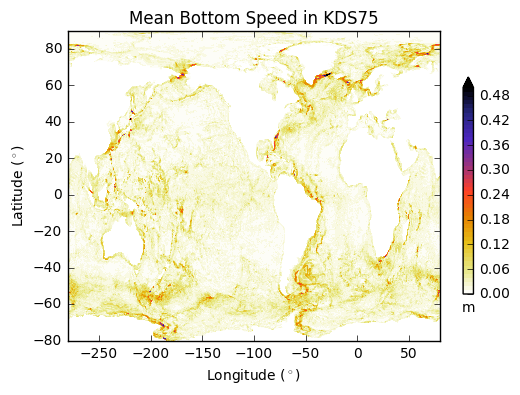

In [15]:

plt.contourf(geolon_t,geolat_t,uvbar,cmap=plt.cm.CMRmap_r,levels=clev,extend='max')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Mean Bottom Speed in KDS75')

plt.show()

plot std of bottom vels

In [16]:
#uvbot=np.ma.sqrt(vbot**2 + ubot**2)

uvstd=np.ma.std(np.ma.sqrt(vbot**2 + ubot**2),axis=0)



/Users/johnspence/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6446: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


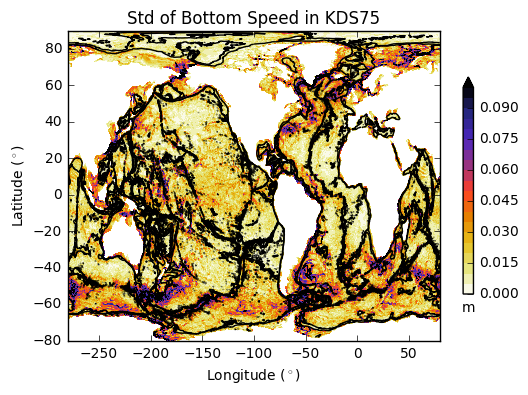

In [17]:
clev = np.linspace(0,0.1,21)
klev = np.arange(1000,4000,2000)

plt.contourf(geolon_t,geolat_t,uvbar,cmap=plt.cm.CMRmap_r,levels=clev,extend='max')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
plt.contour(geolon_t,geolat_t,h,levels=klev,colors='k',linewidth=0.25)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Std of Bottom Speed in KDS75')

plt.show()

plt.savefig('std.pdf')

## Make an extra pretty version

In [50]:
ny,nx = geolon_t.shape
shifty = np.zeros(geolat_t.shape)
for j in range(2200):
        ii = np.max(np.where(geolon_t[j,:]<-180)) + 1
        #print(j)
    
    #for j in range(1):
    #tmp=np.where(geolon_t[j,:]<-180)
    #print(tmp)
    #ii = np.max(np.where(geolon_t[j,:]<-180)) + 1
    #print(ii)
    #shifty[j,(3600-ii):] = geolat_t[j,:ii]
    #shifty[j,:(3600-ii)] = geolat_t[j,ii:]

ValueError: zero-size array to reduction operation maximum which has no identity

In [46]:
ny

2700

In [31]:
a=np.max(tmp)+1
a

900

In [32]:
ii = np.max(tmp) + 1

In [18]:
lon = shifted(geolon_t,geolon_t)
lat = shifted(geolat_t,geolon_t)
uvstd2 = shifted(uvstd,geolon_t)
h2 = shifted(h,geolon_t)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:

map = Basemap(projection='mbtfpq',lon_0 = 0,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-60.,61.,30.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,90.),labels=[False,False,False,True])
X, Y = map(lon,lat) 

map.contourf(X,Y,uvstd2, colors='k',linewidths=0.5,levels=clev) 
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

map.contour(X,Y,h,levels=klev,extend='max') #CMRmap_r, gist_stern_r
#cb.ax.yaxis.set_major_formatter(x_formatter)
plt.title('(STD of Bottom Vels)')